## Importation packages

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')


## Chargement des données

In [55]:
#Chargement des données
data = pd.read_csv("dataset_sdn.csv")

In [56]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


## Analyse de données

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [58]:
data['src'].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [59]:
data['Protocol'].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [60]:
data['dst'].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [61]:
Ip_Source_Mapping = {'10.0.0.1' :1 ,
              '10.0.0.2' : 2,
              '10.0.0.3' : 3,
              '10.0.0.4' : 4,
              '10.0.0.5' : 5,
              '10.0.0.6' : 6,
              '10.0.0.7' :7,
              '10.0.0.8' : 8,
              '10.0.0.9' : 9,
              '10.0.0.10' :10,
              '10.0.0.11' :11,
              '10.0.0.12' : 12,
              '10.0.0.13' :13,
              '10.0.0.14' :14,
              '10.0.0.15' :15,
              '10.0.0.16' :16,
              '10.0.0.17' :17,
              '10.0.0.18' :18,  
              '10.0.0.20' :20 }
data['src']=data['src'].map(Ip_Source_Mapping)
data.head(10)
          
          

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [62]:
encodage1 = LabelEncoder()

In [63]:
data['dst'] = encodage1.fit_transform(data['dst'])
data['Protocol'] = encodage1.fit_transform(data['Protocol'])

<Axes: >

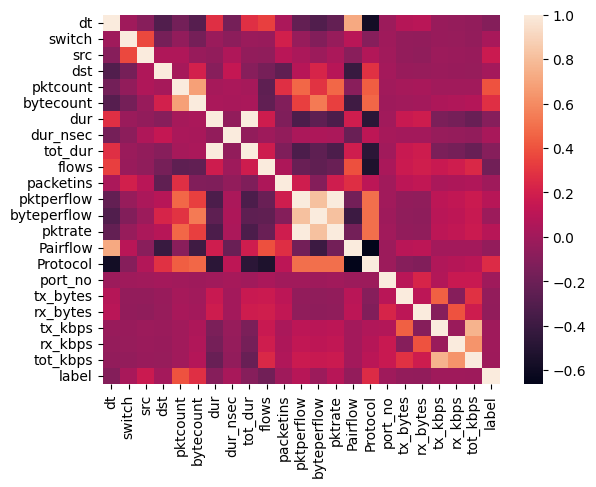

In [64]:
sns.heatmap(data.corr(), annot = False)

In [65]:
data.corr().label.sort_values(ascending=False)

label          1.000000
pktcount       0.401894
bytecount      0.277481
Protocol       0.258355
src            0.162770
pktrate        0.088013
pktperflow     0.087819
dur_nsec       0.029064
switch         0.028027
dst            0.016282
packetins     -0.002642
port_no       -0.004734
tx_kbps       -0.006297
rx_kbps       -0.006714
tot_kbps      -0.008748
byteperflow   -0.015192
Pairflow      -0.049159
tx_bytes      -0.050115
rx_bytes      -0.057490
dur           -0.098479
tot_dur       -0.098491
dt            -0.110126
flows         -0.182174
Name: label, dtype: float64

In [66]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [67]:
sub_data = data[['pktcount', 'bytecount', 'Protocol','src', 'pktrate','pktperflow', 'dur_nsec', 'switch', 'dst', 'label']]

In [68]:
sub_data.head()

,pktcount,bytecount,Protocol,src,pktrate,pktperflow,dur_nsec,switch,dst,label
0,45304,48294064,2,1,451,13535,716000000,1,16,0
1,126395,134737070,2,1,451,13531,734000000,1,16,0
2,90333,96294978,2,2,451,13534,744000000,1,16,0
3,90333,96294978,2,2,451,13534,744000000,1,16,0
4,90333,96294978,2,2,451,13534,744000000,1,16,0


<Axes: >

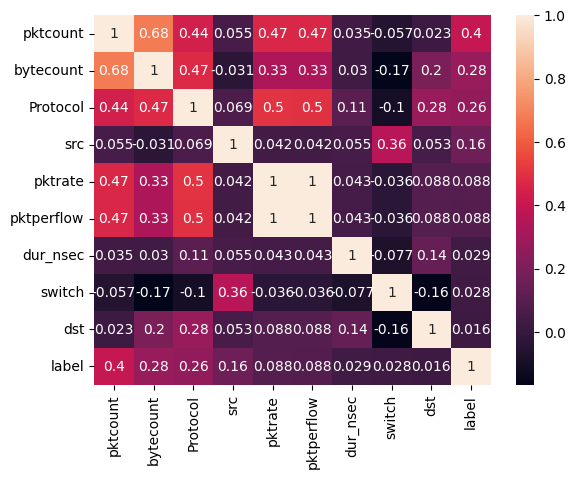

In [69]:
sns.heatmap(sub_data.corr(), annot=True)

## Division de données entrainement et test

In [70]:
X = sub_data.iloc[:,:-1]
y = sub_data.iloc[:,-1]

In [71]:
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=35)

In [72]:
print("X-train Shape:", X_train.shape)
print("y-train Shape:", y_train.shape)
print("X-test Shape:", X_test.shape)
print("y-test Shape:", y_test.shape)

X-train Shape: (73041, 9)
y-train Shape: (73041,)
X-test Shape: (31304, 9)
y-test Shape: (31304,)


In [73]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Construction du Shallow Neural Network

In [74]:
# Création d'une instance de la classe Sequential
model = Sequential()

In [75]:
# Ajout de la premiere couche
model.add(Dense(10, input_shape=(9,), activation='relu'))

# Ajout de la couche de Sortie
model.add(Dense(1, activation='sigmoid'))

# Compiler le model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Affichage de l'architecture du reseau de neurone
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Entrainement du modele
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8839 - loss: 0.2796 - val_accuracy: 0.9268 - val_loss: 0.1796
Epoch 2/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9265 - loss: 0.1799 - val_accuracy: 0.9385 - val_loss: 0.1630
Epoch 3/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.9328 - loss: 0.1700 - val_accuracy: 0.9384 - val_loss: 0.1580
Epoch 4/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9366 - loss: 0.1649 - val_accuracy: 0.9373 - val_loss: 0.1564
Epoch 5/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.9393 - loss: 0.1614 - val_accuracy: 0.9296 - val_loss: 0.1694
Epoch 6/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.9405 - loss: 0.1587 - val_accuracy: 0.9467 - val_loss: 0.1422
Epoch 7/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.9438 - loss: 0.1483 - val_accuracy: 0.9425 - val_loss: 0.1560
Epoch 8/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.9431 - loss:

In [77]:
model.evaluate(X_test, y_test)

979/979 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.9571 - loss: 0.1047


[0.10345180332660675, 0.9568426012992859]

In [78]:
## Visualisation de l'évolution d'entrainnement du réseau de neurone
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

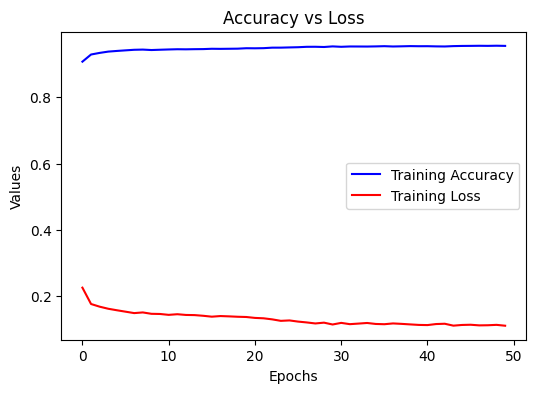

In [79]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()

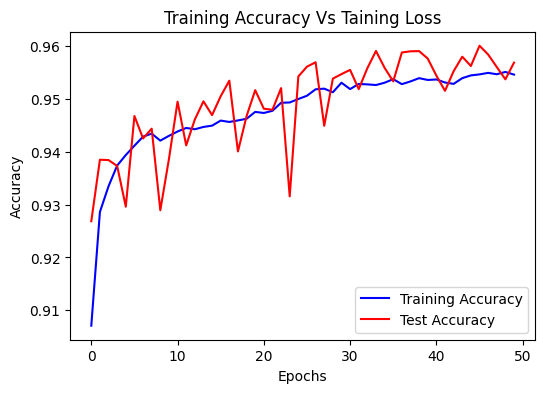

In [80]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

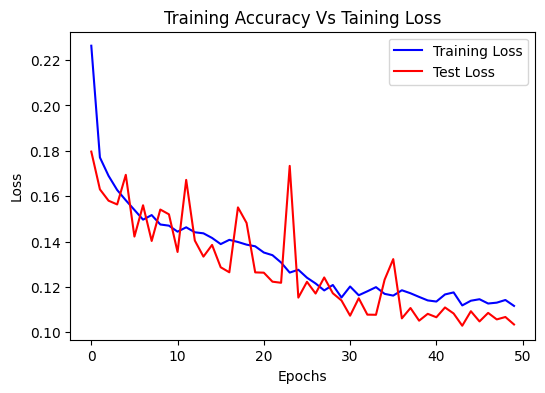

In [81]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

## Evaluation du modèle

In [82]:
# Prediction des Sorties
y_pred = model.predict(X_test)
y_pred

979/979 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


array([[0.9950146 ],
       [0.9999987 ],
       [0.9876322 ],
       ...,
       [0.99963146],
       [0.964291  ],
       [0.9982009 ]], dtype=float32)

## Sauvegarde du modèle entrainé

In [83]:
model.save('model.h5')

## Prédiction simple

In [84]:
sub_data.head()
# Une simple prediction 
model.predict(scaler.transform([[45304,	48294064,	2,	1,	451,	13535,	716000000,	1,	16]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.00016101]], dtype=float32)

In [85]:
sub_data[sub_data['label'] == 1]
# Une simple prediction 
model.predict(scaler.transform([[4777,	5092282,	2,	1,	0,	0,	711000000,	1,	16	]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[1.]], dtype=float32)

In [86]:
resultats_1 = model.predict(scaler.transform([[45304,	48294064,	2,	1,	451,	13535,	716000000,	1,	16]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [87]:
if resultats_1 > 0.5:
    print("Malign")
else :
    print("Benign")

Benign


In [88]:
resultats_2 = model.predict(scaler.transform([[4777,	5092282,	2,	1,	0,	0,	711000000,	1,	16	]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [89]:
if resultats_2 > 0.5:
    print("Malign")
else :
    print("Benign")

Malign
